## Wines
http://archive.ics.uci.edu/ml/datasets/Wine

In [1]:
import scipy
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
s = requests.get(url).content

titles = ['class','Alcohol',
'Malic acid',
'Ash',
'Alcalinity of ash',
'Magnesium',
'Total phenols',
'Flavanoids',
'Nonflavanoid phenols',
'Proanthocyanins',
'Color intensity',
'Hue',
'OD280/OD315 of diluted wines',
'Proline']

data = pd.read_csv(io.StringIO(s.decode('utf-8')), names=titles)


In [3]:
data.head()
# class 1 59
# class 2 71
# class 3 48

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Explore data

In [4]:
f = data.corr().unstack().reset_index()
f= f[f[0] != 1]
correlated_features = f.sort_values(by=0,ascending=False)
correlated_features[correlated_features[0] > .4]

,level_0,level_1,0
91,Total phenols,Flavanoids,0.864564
104,Flavanoids,Total phenols,0.864564
110,Flavanoids,OD280/OD315 of diluted wines,0.787194
175,OD280/OD315 of diluted wines,Flavanoids,0.787194
96,Total phenols,OD280/OD315 of diluted wines,0.699949
174,OD280/OD315 of diluted wines,Total phenols,0.699949
133,Proanthocyanins,Flavanoids,0.652692
107,Flavanoids,Proanthocyanins,0.652692
27,Alcohol,Proline,0.643720
183,Proline,Alcohol,0.643720


In [5]:
correlated_features[correlated_features[0] < -.6]

,level_0,level_1,0
154,Hue,class,-0.617369
11,class,Hue,-0.617369
182,Proline,class,-0.633717
13,class,Proline,-0.633717
6,class,Total phenols,-0.719163
84,Total phenols,class,-0.719163
12,class,OD280/OD315 of diluted wines,-0.788230
168,OD280/OD315 of diluted wines,class,-0.788230
7,class,Flavanoids,-0.847498
98,Flavanoids,class,-0.847498


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113995890>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113f3c890>]], dtype=object)

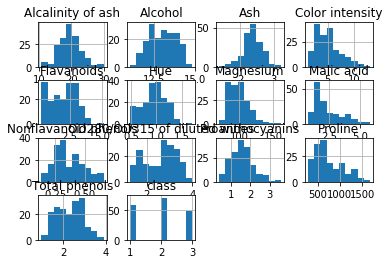

In [19]:
data.hist(stacked=True)

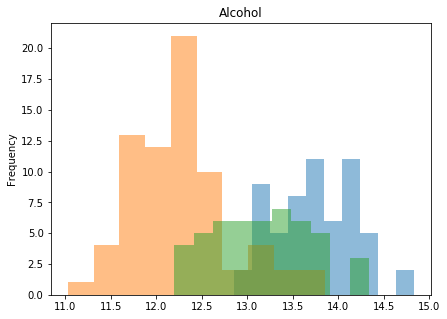

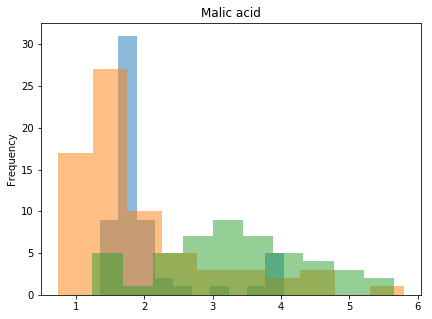

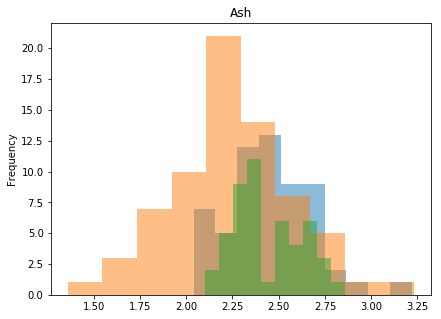

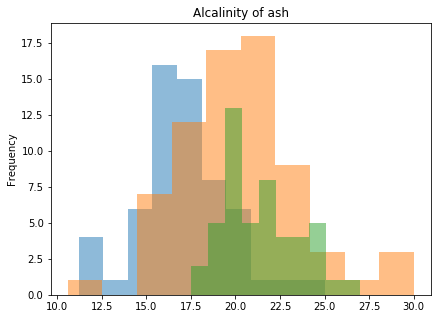

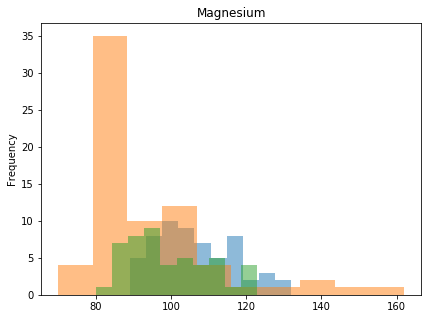

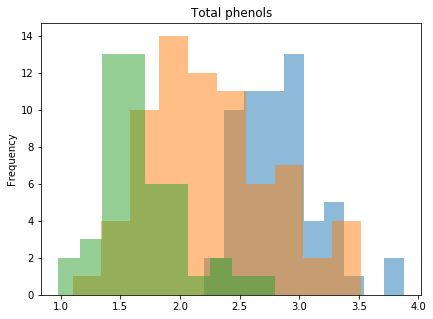

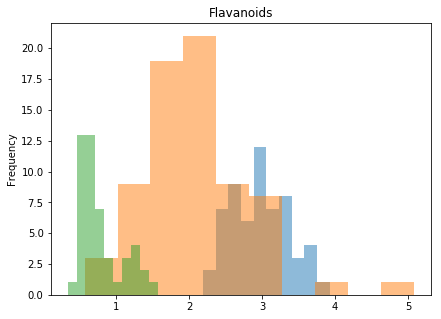

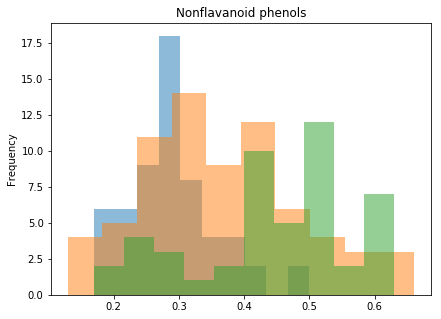

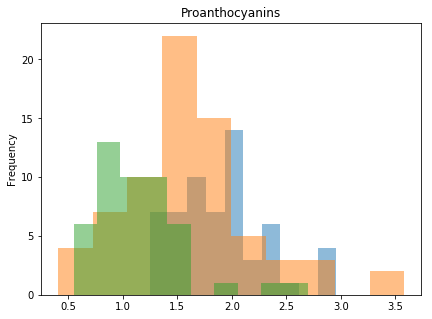

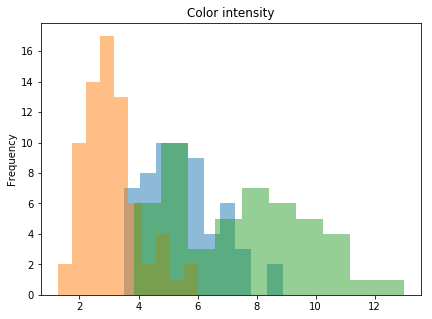

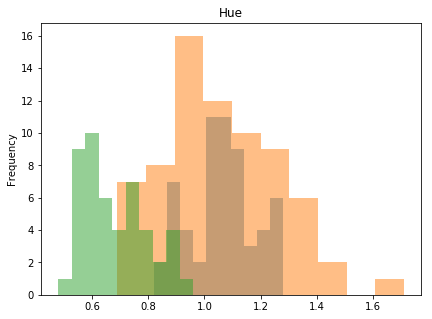

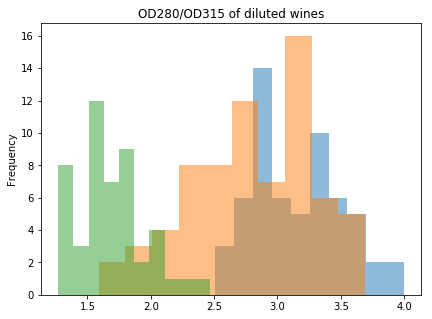

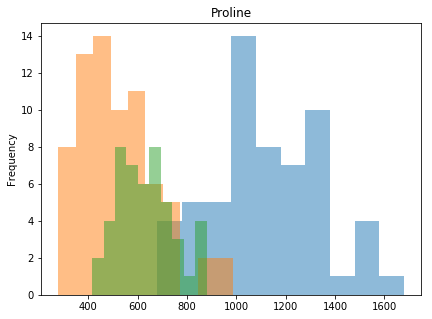

In [20]:
import pdb
for i, title in enumerate(data.columns[1::]):
#     print title
    plt.figure(i+1,figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.title(title)
    a = data[title][data['class'] == 1]
    b = data[title][data['class'] == 2]
    c = data[title][data['class'] == 3]
    ax = a.plot.hist(alpha=.5)
    b.plot.hist(alpha=.5)
    c.plot.hist(alpha=.5)

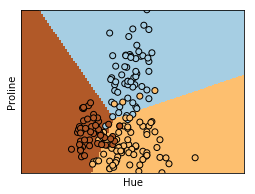

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
X = data[['Hue','Proline']]  # we only take the first two features.
Y = data['class']

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X['Hue'].min() - .5, X['Hue'].max() + .5
y_min, y_max = X['Proline'].min() - .5, X['Proline'].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X['Hue'], X['Proline'], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Hue')
plt.ylabel('Proline')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Build Model

In [6]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

Automatically created module for IPython interactive environment


In [22]:
# preprocess dataset, split into training and test part
import pdb

X = data.drop('class', 1)  # we only take the first two features.
y = data['class']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)
# iterate over classifiers
scores = dict()
coefficents = dict()
importance = dict()
for name, clf in zip(names, classifiers):
    model = clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores[name] = score
    print name
#     pdb.set_trace()
    try:
        coefficents[name] = model.coef_
    except:
        print "Model {} doesn't have coef_".format(name)
    try: 
        coefficents[name] = model.coefs_
    except:
        print "Model {} doesn't have coefs".format(name)
    try:
        importance[name] = model.feature_importances_
    except:
        print "Model {} doesn't have feature importance".format(name)
scores

Nearest Neighbors
Model Nearest Neighbors doesn't have coef_
Model Nearest Neighbors doesn't have coefs
Model Nearest Neighbors doesn't have feature importance
Linear SVM
Model Linear SVM doesn't have coefs
Model Linear SVM doesn't have feature importance
RBF SVM
Model RBF SVM doesn't have coef_
Model RBF SVM doesn't have coefs
Model RBF SVM doesn't have feature importance
Gaussian Process
Model Gaussian Process doesn't have coef_
Model Gaussian Process doesn't have coefs
Model Gaussian Process doesn't have feature importance
Decision Tree
Model Decision Tree doesn't have coef_
Model Decision Tree doesn't have coefs
Random Forest
Model Random Forest doesn't have coef_
Model Random Forest doesn't have coefs
Neural Net
Model Neural Net doesn't have coef_
Model Neural Net doesn't have feature importance
AdaBoost
Model AdaBoost doesn't have coef_
Model AdaBoost doesn't have coefs
Naive Bayes
Model Naive Bayes doesn't have coef_
Model Naive Bayes doesn't have coefs
Model Naive Bayes doesn't

{'AdaBoost': 0.94444444444444442,
 'Decision Tree': 0.93055555555555558,
 'Gaussian Process': 0.95833333333333337,
 'Linear SVM': 0.98611111111111116,
 'Naive Bayes': 1.0,
 'Nearest Neighbors': 0.94444444444444442,
 'Neural Net': 1.0,
 'QDA': 0.97222222222222221,
 'RBF SVM': 0.375,
 'Random Forest': 0.94444444444444442}

In [37]:
coefficents

{'Linear SVM': array([[ 0.3499077 ,  0.01953408,  0.11100026, -0.28878896,  0.14208167,
          0.04252936,  0.0810023 ,  0.00588759,  0.06361537,  0.15572219,
         -0.037678  ,  0.11300527,  0.36868015],
        [ 0.01769545, -0.0070059 ,  0.05171262, -0.11024156, -0.00333025,
          0.16019444,  0.24865666, -0.06586397,  0.15713384, -0.09185937,
          0.14943992,  0.26354654,  0.13809287],
        [-0.14712946, -0.15838857, -0.1506434 , -0.01263847, -0.11756343,
          0.06191758,  0.2496766 , -0.00688068,  0.20368704, -0.26829219,
          0.2594995 ,  0.2916431 , -0.05544988]]),
 'Neural Net': [array([[ 0.11631665,  0.02249729, -0.03704981, ...,  0.17314565,
           0.11594755,  0.08029969],
         [-0.08822832, -0.06111886,  0.07702701, ...,  0.09132966,
          -0.10076857,  0.10059928],
         [ 0.13013296, -0.07974539, -0.0539471 , ..., -0.01334497,
           0.0953389 , -0.03854213],
         ..., 
         [-0.05633251, -0.28229739, -0.02191362, ...

In [23]:
importance

{'AdaBoost': array([ 0.02,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.48,  0.  ,  0.02,
         0.02,  0.  ,  0.44,  0.02]),
 'Decision Tree': array([ 0.        ,  0.02465594,  0.02802769,  0.        ,  0.        ,
         0.        ,  0.41021572,  0.        ,  0.        ,  0.4164163 ,
         0.        ,  0.        ,  0.12068434]),
 'Random Forest': array([ 0.06754604,  0.02973447,  0.05240773,  0.13406625,  0.12212473,
         0.01382856,  0.13266066,  0.03985229,  0.06566131,  0.1137563 ,
         0.07209462,  0.04410487,  0.11216217])}

In [39]:
# list(data.columns[1::])
coefficents['Linear SVM'][0]

array([ 0.3499077 ,  0.01953408,  0.11100026, -0.28878896,  0.14208167,
        0.04252936,  0.0810023 ,  0.00588759,  0.06361537,  0.15572219,
       -0.037678  ,  0.11300527,  0.36868015])

In [47]:
list(data.columns)[1::]
#, list(coefficents['Linear SVM'][0]))

['Alcohol',
 'Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total phenols',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity',
 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline']

In [53]:

pd.DataFrame(zip(list(data.columns)[1::], 
        list(coefficents['Linear SVM'][0]),
         list(coefficents['Linear SVM'][1]), 
         list(coefficents['Linear SVM'][2]) )).sort_values(by=1, ascending=False)

,0,1,2,3
12,Proline,0.368680,0.138093,-0.055450
0,Alcohol,0.349908,0.017695,-0.147129
9,Color intensity,0.155722,-0.091859,-0.268292
4,Magnesium,0.142082,-0.003330,-0.117563
11,OD280/OD315 of diluted wines,0.113005,0.263547,0.291643
2,Ash,0.111000,0.051713,-0.150643
6,Flavanoids,0.081002,0.248657,0.249677
8,Proanthocyanins,0.063615,0.157134,0.203687
5,Total phenols,0.042529,0.160194,0.061918
1,Malic acid,0.019534,-0.007006,-0.158389


In [90]:
import subprocess

In [89]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

clf.predict([[2., 2.]])

clf.predict_proba([[2., 2.]])

from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
from sklearn.tree import export_graphviz
import subprocess


def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except ValueError as e:
        print ("Could not run dot, ie graphviz, to "
             "produce visualization")
        print e
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")
# features = list(iris.data.columns[:4])
# print("* features:", features, sep="\n")/        
visualize_tree(clf, ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])       



OSError: [Errno 2] No such file or directory

### Validate Model
##### Bootstrapping to look at coefficients
##### ROC curve, precision recall

Automatically created module for IPython interactive environment


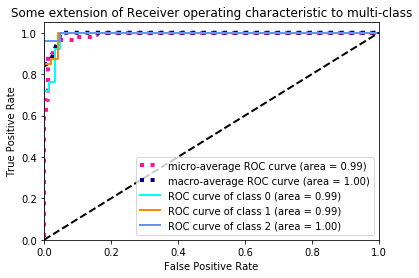

In [67]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
lw = 2

# Import some data to play with
# iris = datasets.load_iris()
X = data.drop('class', 1)
y = data['class']

# Binarize the output
y = label_binarize(y, classes=[1, 2, 3])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree

clf = tree.DecisionTreeClassifier()
iris = load_iris()

clf = clf.fit(iris.data, iris.target)
tree.export_graphviz(clf, out_file='tree.dot')  

In [3]:
!dot -Tps tree.dot -o outfile.ps

/bin/sh: dot: command not found
